# For Experiment 1 (for now):
## Create PSD figures, including aperiodic signal

##### We need to make a PSD's and their aperiodic signal for every timestamp (baseline and retention), lateralization (ipsi vs contra), and do this for each condition/set-szie (1, 3 or 6 items).


## NOTE: frequency axis is not 1,2,3 but slightly different. Therefore, indexing [2:40] does not mean using frequency 2 to 40. But now you're using 2.72Hz until 35 Hz. Something to keep in mind and discuss

### Importing libraries & Dataset + settings|

In [29]:
%matplotlib inline

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

# Default figure size larger! 
figure = {'figsize': (13,8)}
plt.rc('figure', **figure)
sns.set_context('talk', font_scale=1.2)
fs = 24

In [30]:
# Load the PSDs
#  PSD_exp1_dataframe[ppn, freq_axis, setsize, lateralization, timeperiod]
#  freq_axis: 138 stamps of frequencies
#  setsize: 0 = 1, 1 = 3, 2 = 6
#  lateralization: 0 = contra, 1 = ipsi
# timeperiod: 0 = baseline, 1 = retention

# PSD_dataframe = np.load('../New_saved_files/FOOOF_results/PSD_exp1_dataframe.npy')
psd_dataframe_alpha = np.load('../saved_files/fooof_results/exp1_output/main_analysis/alpha_exp1_psd.npy')

# Load x-axis (frequencies)
x_axis = np.load('../saved_files/fooof_results/exp1_output/main_analysis/freq_x_axis.npy')


# THETA
#  psd_exp1_dataframe_theta[ppn, freq_axis, setsize, timeperiod]
#  freq_axis: 138 stamps of frequencies
#  setsize: 0 = 1, 1 = 3, 2 = 6
# timeperiod: 0 = baseline, 1 = retention
psd_dataframe_theta = np.load('../saved_files/fooof_results/exp1_output/main_analysis/theta_exp1_psd.npy')
# NO THETA
psd_dataframe_no_theta = np.load('../saved_files/fooof_results/exp1_output/main_analysis/no_theta_exp1_psd.npy')


## Experiment 1 -- alpha

### Alpha proof

In [31]:
psd_dataframe_alpha.shape

(26, 138, 3, 2, 2)

In [32]:
# alpha_avg_sub_perf.shape

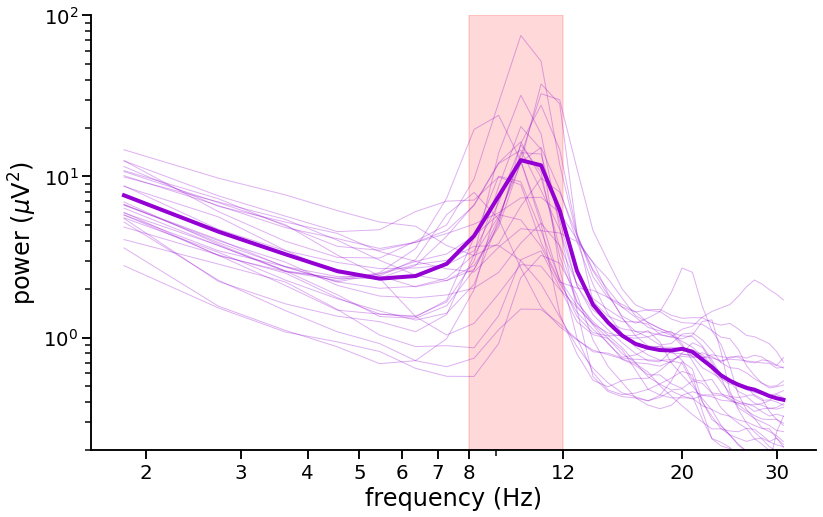

In [33]:
# From retention period, get average psd over good and poor performance
# [ppn, freq_axis, performance, hemisphere, timeperiod]
alpha_avg_perf = np.mean(psd_dataframe_alpha[:,:,:,1], axis = (2,3))
alpha_avg_sub_perf = np.mean(alpha_avg_perf, axis = 0)



# plot line per ppn
for ppn_with in range(len(alpha_avg_perf)):
    plt.loglog(x_axis[2:35], alpha_avg_perf[ppn_with][2:35], 'darkviolet', alpha = 0.3, linewidth = 1)


# plot average
plt.loglog(x_axis[2:35], alpha_avg_sub_perf[2:35], 'darkviolet', linewidth = 4, label = "alpha")


plt.axvspan(8, 12, alpha = 0.15, color = 'red')
# plt.grid()
sns.despine()
plt.ylim(10**-0.7, 10**2)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.ylabel("power ($\mu$V$^2$)", fontsize = fs)
plt.xlabel("frequency (Hz)", fontsize = fs)
plt.xticks(ticks=[2, 3, 4, 5, 6, 7, 8, 12, 20, 30], labels=['2', '3', '4', '5', '6', '7', '8', '12', '20', '30'])

# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
# plt.title('Average PSD per ppn for THETA and NO_THETA during retention period')

plt.savefig('../figures/exp1_figures/figx_exp1_alpha_proof_loglog.pdf', format='pdf')

plt.show()

In [34]:
# WE don't need to plot each individual PSD --> average over ppn
psd_average_alpha = np.mean(psd_dataframe_alpha, axis = 0)
np.shape(psd_average_alpha)

(138, 3, 2, 2)

In [35]:
#  PSD_exp1_dataframe[ppn, freq_axis, setsize, lateralization, timeperiod]
#  freq_axis: 138 stamps of frequencies
#  setsize: 0 = 1, 1 = 3, 2 = 6
#  lateralization: 0 = contra, 1 = ipsi
# timeperiod: 0 = baseline, 1 = retention
np.shape(psd_dataframe_alpha)
psd_alpha_avlat = psd_dataframe_alpha.mean(axis=3)
np.shape(psd_alpha_avlat)

(26, 138, 3, 2)

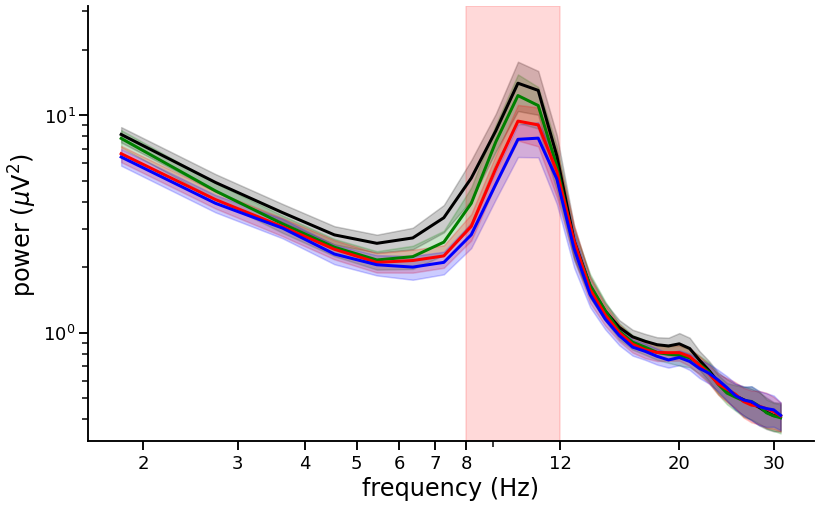

In [36]:
mean_1 = psd_alpha_avlat[:, 2:35, 0, 1].mean(axis=0)
mean_3 = psd_alpha_avlat[:, 2:35, 1, 1].mean(axis=0)
mean_6 = psd_alpha_avlat[:, 2:35, 2, 1].mean(axis=0)
baseline = psd_alpha_avlat[:, 2:35, :, 0].mean(axis=(0,2))

# compute standard error of the mean
sem_1 = sp.stats.sem(psd_alpha_avlat[:, 2:35, 0, 1])
sem_3 = sp.stats.sem(psd_alpha_avlat[:, 2:35, 1, 1])
sem_6 = sp.stats.sem(psd_alpha_avlat[:, 2:35, 2, 1])
sem_bas = sp.stats.sem(psd_alpha_avlat[:, 2:35, :, 0].mean(axis=2))

plt.loglog(x_axis[2:35], baseline, color = 'k', lw = 3, label = 'baseline')
plt.fill_between(x_axis[2:35], baseline-sem_bas, baseline+sem_bas, color = 'k', alpha = 0.2)

plt.loglog(x_axis[2:35], mean_1, 'g', label = 'set-size 1', linewidth = 3)
plt.fill_between(x_axis[2:35], mean_1-sem_1, mean_1+sem_1, color = 'g', alpha = 0.2)
plt.loglog(x_axis[2:35], mean_3, 'r', label = 'set-size 3', linewidth = 3)
plt.fill_between(x_axis[2:35], mean_3-sem_3, mean_3+sem_3, color = 'r', alpha = 0.2)
plt.loglog(x_axis[2:35], mean_6, 'b', label = 'set-size 6', linewidth = 3)
plt.fill_between(x_axis[2:35], mean_6-sem_6, mean_6+sem_6, color = 'b', alpha = 0.2)

plt.axvspan(8, 12, alpha = 0.15, color = 'red')
# plt.grid()
sns.despine()
plt.ylim(10**-0.5, 10**1.5)

plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.ylabel("power ($\mu$V$^2$)", fontsize = fs)
plt.xlabel("frequency (Hz)", fontsize = fs)
plt.xticks(ticks=[2, 3, 4, 5, 6, 7, 8, 12, 20, 30], labels=['2', '3', '4', '5', '6', '7', '8', '12', '20', '30'])

# plt.legend(prop = {'size': 22})
# plt.title('Average PSD per ppn for ALPHA during retention period per setsize')
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.savefig('../figures/exp1_figures/fig3_exp1_alpha_setsizes.tiff', format='tiff')

plt.show()

# THETA

## Plotting theta vs no theta groups

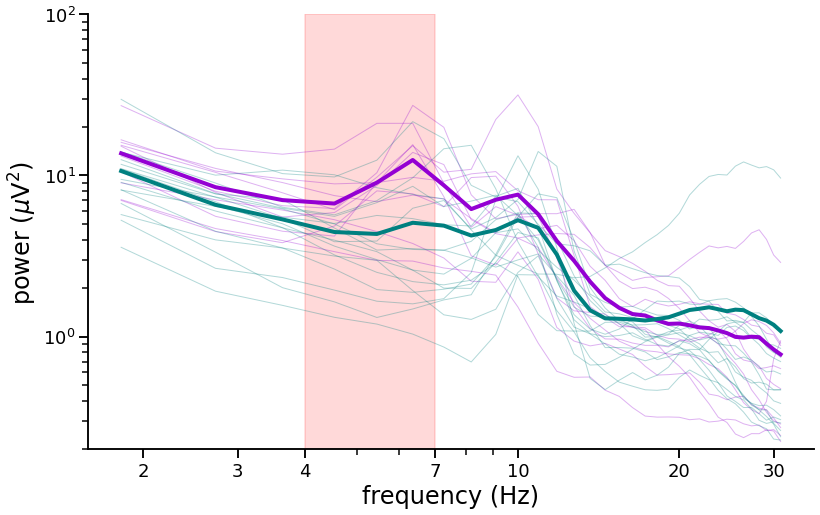

In [37]:
# From retention period, get average psd over good and poor performance
# [ppn, freq_axis, performance, timeperiod]
theta_avg_perf = np.mean(psd_dataframe_theta[:,:,:,1], axis = 2)
theta_avg_sub_perf = np.mean(theta_avg_perf, axis = 0)
no_theta_avg_perf = np.mean(psd_dataframe_no_theta[:,:,:,1], axis = 2)
no_theta_avg_sub_perf = np.mean(no_theta_avg_perf, axis = 0)


# plot line per ppn
for ppn_with in range(len(theta_avg_perf)):
    plt.loglog(x_axis[2:35], theta_avg_perf[ppn_with][2:35], 'darkviolet', alpha = 0.3, linewidth = 1)

for ppn_wo in range(len(no_theta_avg_perf)):
    plt.loglog(x_axis[2:35], no_theta_avg_perf[ppn_wo][2:35], 'teal', alpha = 0.3, linewidth = 1)

# plot average per theta and no theta group
plt.loglog(x_axis[2:35], theta_avg_sub_perf[2:35], 'darkviolet', linewidth = 4, label = "theta")
plt.loglog(x_axis[2:35], no_theta_avg_sub_perf[2:35], 'teal', linewidth = 4, label = "no theta")

plt.axvspan(4, 7, alpha = 0.15, color = 'red')
# plt.grid()
sns.despine()
# plt.ylim(10**-0.5, 10**1.5)
plt.ylim(10**-0.7, 10**2)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.ylabel("power ($\mu$V$^2$)", fontsize = fs)
plt.xlabel("frequency (Hz)", fontsize = fs)
plt.xticks(ticks=[2, 3, 4, 7, 10, 20, 30], labels=['2', '3', '4', '7', '10', '20', '30'])

# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
# plt.title('Average PSD per ppn for THETA and NO_THETA during retention period')

plt.savefig('../figures/exp1_figures/figx_exp1_theta_proof_loglog.pdf', format='pdf')

plt.show()

In [38]:
# [ppn, freq_axis, setsize, timeperiod]
psd_dataframe_theta.shape

(10, 138, 3, 2)

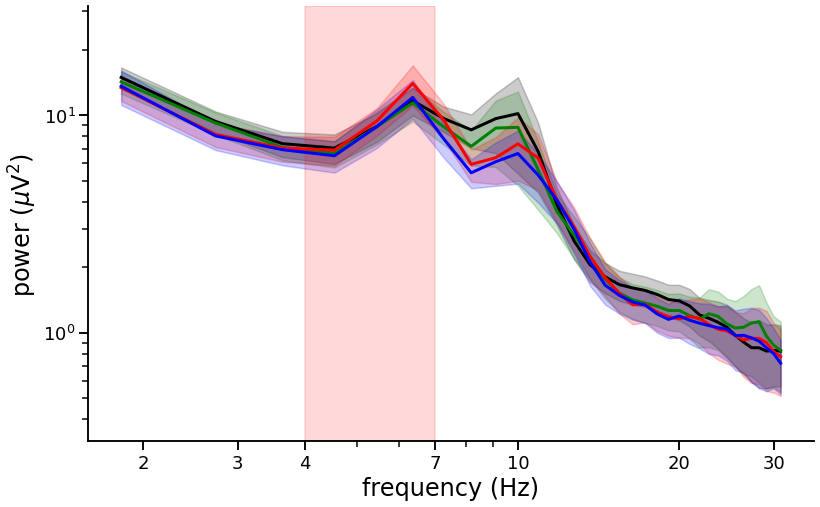

In [39]:

mean_1 = psd_dataframe_theta[:, 2:35, 0, 1].mean(axis=0)
mean_3 = psd_dataframe_theta[:, 2:35, 1, 1].mean(axis=0)
mean_6 = psd_dataframe_theta[:, 2:35, 2, 1].mean(axis=0)
baseline = psd_dataframe_theta[:, 2:35, :, 0].mean(axis=(0,2))

# compute standard error of the mean
sem_1 = sp.stats.sem(psd_dataframe_theta[:, 2:35, 0, 1])
sem_3 = sp.stats.sem(psd_dataframe_theta[:, 2:35, 1, 1])
sem_6 = sp.stats.sem(psd_dataframe_theta[:, 2:35, 2, 1])
sem_bas = sp.stats.sem(psd_dataframe_theta[:, 2:35, :, 0].mean(axis=2))

plt.loglog(x_axis[2:35], baseline, color = 'k', lw = 3, label = 'baseline')
plt.fill_between(x_axis[2:35], baseline-sem_bas, baseline+sem_bas, color = 'k', alpha = 0.2)

plt.loglog(x_axis[2:35], mean_1, 'g', label = 'set-size 1', linewidth = 3)
plt.fill_between(x_axis[2:35], mean_1-sem_1, mean_1+sem_1, color = 'g', alpha = 0.2)
plt.loglog(x_axis[2:35], mean_3, 'r', label = 'set-size 3', linewidth = 3)
plt.fill_between(x_axis[2:35], mean_3-sem_3, mean_3+sem_3, color = 'r', alpha = 0.2)
plt.loglog(x_axis[2:35], mean_6, 'b', label = 'set-size 6', linewidth = 3)
plt.fill_between(x_axis[2:35], mean_6-sem_6, mean_6+sem_6, color = 'b', alpha = 0.2)

plt.axvspan(4, 7, alpha = 0.15, color = 'red')
# plt.grid()
sns.despine()
plt.ylim(10**-0.5, 10**1.5)

plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.ylabel("power ($\mu$V$^2$)", fontsize = fs)
plt.xlabel("frequency (Hz)", fontsize = fs)
plt.xticks(ticks=[2, 3, 4, 7, 10, 20, 30], labels=['2', '3', '4', '7', '10', '20', '30'])

# plt.legend(prop = {'size': 22})
# plt.title('Average PSD per ppn for THETA during retention period per setsize')
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.savefig('../figures/exp1_figures/fig3_exp1_theta_setsizes.tiff', format='tiff')

plt.show()

##### plotting NO theta group: poor vs good performance

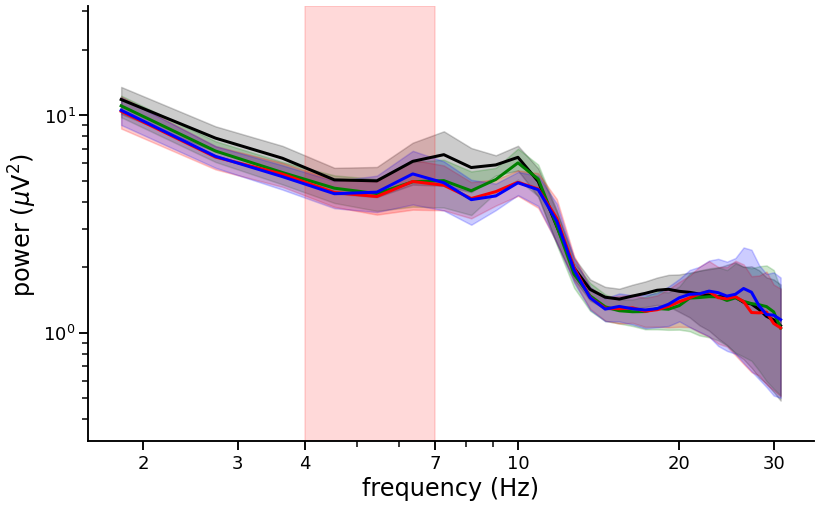

In [40]:
mean_1 = psd_dataframe_no_theta[:, 2:35, 0, 1].mean(axis=0)
mean_3 = psd_dataframe_no_theta[:, 2:35, 1, 1].mean(axis=0)
mean_6 = psd_dataframe_no_theta[:, 2:35, 2, 1].mean(axis=0)
baseline = psd_dataframe_no_theta[:, 2:35, :, 0].mean(axis=(0,2))

# compute standard error of the mean
sem_1 = sp.stats.sem(psd_dataframe_no_theta[:, 2:35, 0, 1])
sem_3 = sp.stats.sem(psd_dataframe_no_theta[:, 2:35, 1, 1])
sem_6 = sp.stats.sem(psd_dataframe_no_theta[:, 2:35, 2, 1])
sem_bas = sp.stats.sem(psd_dataframe_no_theta[:, 2:35, :, 0].mean(axis=2))

plt.loglog(x_axis[2:35], baseline, color = 'k', lw = 3, label = 'baseline')
plt.fill_between(x_axis[2:35], baseline-sem_bas, baseline+sem_bas, color = 'k', alpha = 0.2)

plt.loglog(x_axis[2:35], mean_1, 'g', label = 'set-size 1', linewidth = 3)
plt.fill_between(x_axis[2:35], mean_1-sem_1, mean_1+sem_1, color = 'g', alpha = 0.2)
plt.loglog(x_axis[2:35], mean_3, 'r', label = 'set-size 3', linewidth = 3)
plt.fill_between(x_axis[2:35], mean_3-sem_3, mean_3+sem_3, color = 'r', alpha = 0.2)
plt.loglog(x_axis[2:35], mean_6, 'b', label = 'set-size 6', linewidth = 3)
plt.fill_between(x_axis[2:35], mean_6-sem_6, mean_6+sem_6, color = 'b', alpha = 0.2)

plt.axvspan(4, 7, alpha = 0.15, color = 'red')
# plt.grid()
sns.despine()
plt.ylim(10**-0.5, 10**1.5)

plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.ylabel("power ($\mu$V$^2$)", fontsize = fs)
plt.xlabel("frequency (Hz)", fontsize = fs)
plt.xticks(ticks=[2, 3, 4, 7, 10, 20, 30], labels=['2', '3', '4', '7', '10', '20', '30'])

# plt.legend(prop = {'size': 22})
# plt.title('Average PSD per ppn for THETA during retention period per setsize')
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.savefig('../figures/exp1_figures/fig3_exp1_no_theta_setsizes.tiff', format='tiff')

plt.show()

##### plotting NO theta group: poor vs good performance

In [41]:
# First combine theta and no theta psds's
print(psd_dataframe_theta.shape)
print(psd_dataframe_no_theta.shape)

psd_dataframe_all = np.vstack([psd_dataframe_theta, psd_dataframe_no_theta])
print(psd_dataframe_all.shape)

(10, 138, 3, 2)
(16, 138, 3, 2)
(26, 138, 3, 2)


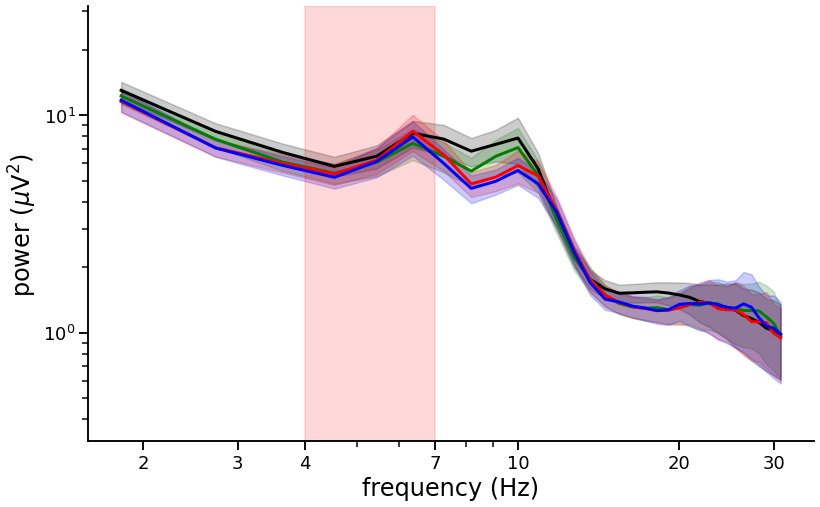

In [42]:
mean_1 = psd_dataframe_all[:, 2:35, 0, 1].mean(axis=0)
mean_3 = psd_dataframe_all[:, 2:35, 1, 1].mean(axis=0)
mean_6 = psd_dataframe_all[:, 2:35, 2, 1].mean(axis=0)
baseline = psd_dataframe_all[:, 2:35, :, 0].mean(axis=(0,2))

# compute standard error of the mean
sem_1 = sp.stats.sem(psd_dataframe_all[:, 2:35, 0, 1])
sem_3 = sp.stats.sem(psd_dataframe_all[:, 2:35, 1, 1])
sem_6 = sp.stats.sem(psd_dataframe_all[:, 2:35, 2, 1])
sem_bas = sp.stats.sem(psd_dataframe_all[:, 2:35, :, 0].mean(axis=2))

plt.loglog(x_axis[2:35], baseline, color = 'k', lw = 3, label = 'baseline')
plt.fill_between(x_axis[2:35], baseline-sem_bas, baseline+sem_bas, color = 'k', alpha = 0.2)

plt.loglog(x_axis[2:35], mean_1, 'g', label = 'set-size 1', linewidth = 3)
plt.fill_between(x_axis[2:35], mean_1-sem_1, mean_1+sem_1, color = 'g', alpha = 0.2)
plt.loglog(x_axis[2:35], mean_3, 'r', label = 'set-size 3', linewidth = 3)
plt.fill_between(x_axis[2:35], mean_3-sem_3, mean_3+sem_3, color = 'r', alpha = 0.2)
plt.loglog(x_axis[2:35], mean_6, 'b', label = 'set-size 6', linewidth = 3)
plt.fill_between(x_axis[2:35], mean_6-sem_6, mean_6+sem_6, color = 'b', alpha = 0.2)

plt.axvspan(4, 7, alpha = 0.15, color = 'red')
# plt.grid()
sns.despine()
plt.ylim(10**-0.5, 10**1.5)

plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.ylabel("power ($\mu$V$^2$)", fontsize = fs)
plt.xlabel("frequency (Hz)", fontsize = fs)
plt.xticks(ticks=[2, 3, 4, 7, 10, 20, 30], labels=['2', '3', '4', '7', '10', '20', '30'])

# plt.legend(prop = {'size': 22})
# plt.title('Average PSD per ppn for THETA during retention period per setsize')
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.savefig('../figures/exp1_figures/fig3_exp1_all_theta_setsizes.tiff', format='tiff')

plt.show()